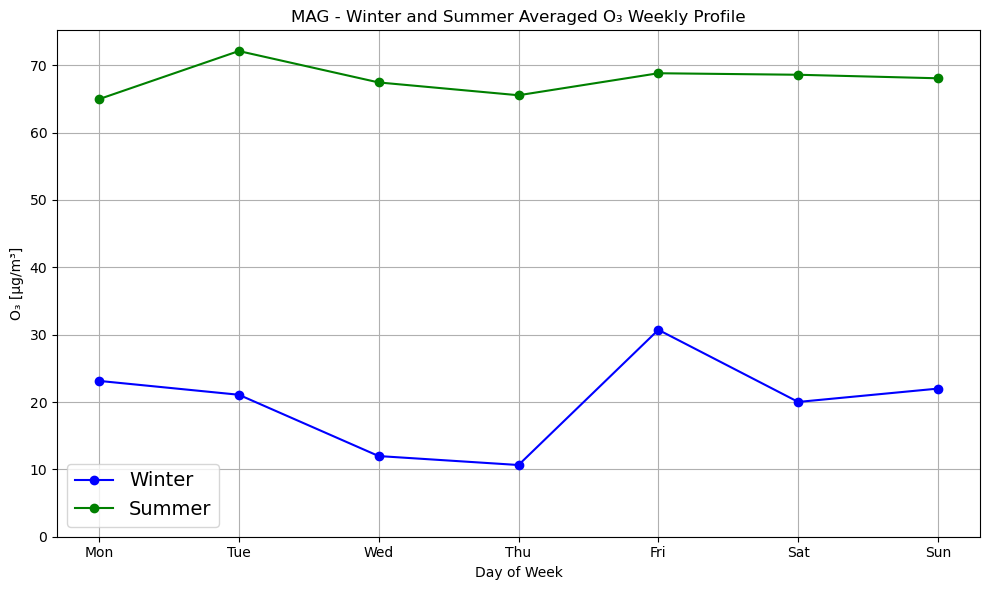

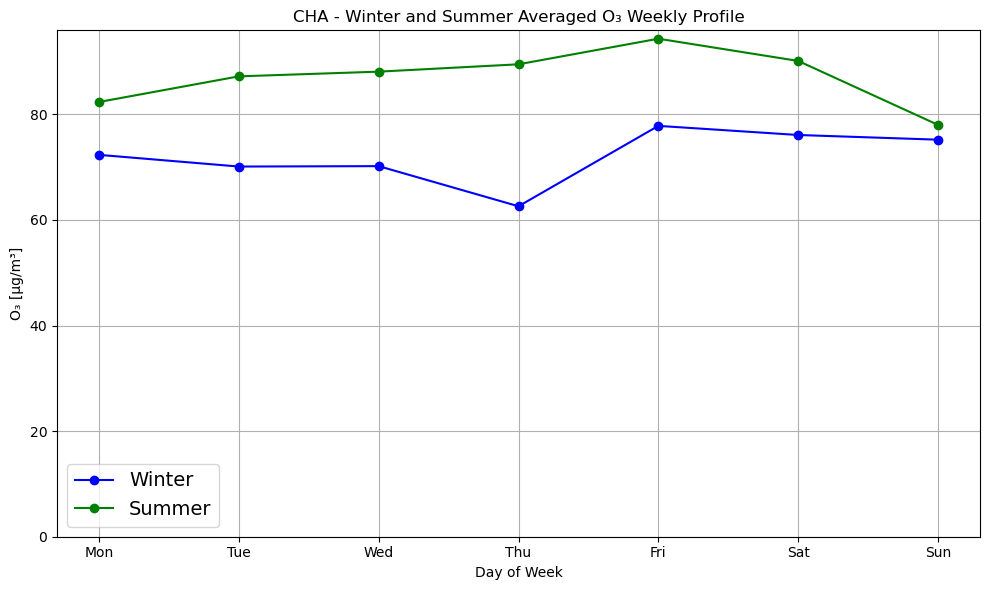

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# --- SETTINGS ---
csv_file = "O3.csv"  # Update with your file path
colors = {'MAG': 'blue', 'CHA': 'green'}
station_cols = {'MAG': 'Magadino-Cadenazzo', 'CHA': 'Chaumont'}
seasons = {'Winter': 12, 'Summer': 6}
year = 2024

# --- Load Data ---
df = pd.read_csv(csv_file, sep=';', parse_dates=['Date/heure'], dayfirst=True)
df = df.rename(columns={'Date/heure': 'datetime'})
df.set_index('datetime', inplace=True)

# --- Get First Monday of a Month ---
def get_first_monday(year, month):
    d = datetime(year, month, 1)
    while d.weekday() != 0:
        d += timedelta(days=1)
    return d

# --- Get 12-week Daily Average by Weekday ---
def get_weekly_profile(df, station_col, start_date):
    end_date = start_date + timedelta(weeks=12)
    df_period = df.loc[(df.index >= start_date) & (df.index < end_date)]

    # Compute daily averages
    daily_avg = df_period.resample('D')[station_col].mean().to_frame(name='ozone')
    daily_avg['weekday'] = daily_avg.index.weekday  # 0 = Monday

    # Group by weekday and average
    weekday_avg = daily_avg.groupby('weekday')['ozone'].mean()
    weekday_avg.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

    return weekday_avg

# --- Plot Function: For Each Station, Compare Winter and Summer ---
def plot_station_comparison(station_code, winter_avg, summer_avg, color_winter, color_summer):
    plt.figure(figsize=(10, 6))
    plt.plot(winter_avg.index, winter_avg.values, marker='o', label='Winter', color=color_winter)
    plt.plot(summer_avg.index, summer_avg.values, marker='o', label='Summer', color=color_summer)
    plt.title(f"{station_code} - Winter and Summer Averaged O₃ Weekly Profile")
    plt.xlabel("Day of Week")
    plt.ylabel("O₃ [µg/m³]")
    plt.grid(True)
    plt.legend(fontsize=14)

    # Set Y-axis to start from 0
    plt.ylim(bottom=0)

    plt.tight_layout()
    plt.show()

# --- Run for Both Stations (MAG and CHA) ---
for station_code, station_col in station_cols.items():
    winter_avg = get_weekly_profile(df, station_col, get_first_monday(year, 12))  # Winter starts in December
    summer_avg = get_weekly_profile(df, station_col, get_first_monday(year, 6))  # Summer starts in June
    plot_station_comparison(station_code, winter_avg, summer_avg, 'blue', 'green')